<a href="https://colab.research.google.com/github/kyik1/Math-200/blob/main/Copy_of_2_sample_t_test_(_Writing_Utensil_vs_GPA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
link = 'https://raw.githubusercontent.com/kmath22/kmath22/main/Copy%20of%20Survey%20example%20%232%20(Responses)%20-%20Form%20Responses%201.csv'

df = pd.read_csv(link)
df.head()

,Timestamp,Writing_utensil,GPA
0,3/23/2023 10:53:39,Pencil,3.70
1,3/23/2023 10:54:52,Pen,3.33
2,3/23/2023 10:55:16,Pencil,3.90
3,3/23/2023 11:01:50,Pen,2.50
4,3/23/2023 11:03:33,Pen,3.00


## Graphs and Analysis

In [ ]:
pip install researchpy

In [ ]:
df(' employed')value_counts().normalize=True.plot(kind='bar')

SyntaxError: invalid syntax (<ipython-input-28-b2a4e6b09bb8>, line 1)

In [ ]:
df.describe()

,GPA
count,76.000000
mean,3.251053
std,0.781270
min,0.000000
25%,2.897500
50%,3.500000
75%,3.837500
max,4.000000


In [ ]:
import researchpy as rp

In [ ]:
rp.summary_cont(df.groupby('Writing_utensil')['GPA'])

,N,Mean,SD,SE,95% Conf.,Interval
Writing_utensil,,,,,,
Pen,35,3.1600,0.7050,0.1192,2.9178,3.4022
Pencil,41,3.3288,0.8418,0.1315,3.0631,3.5945


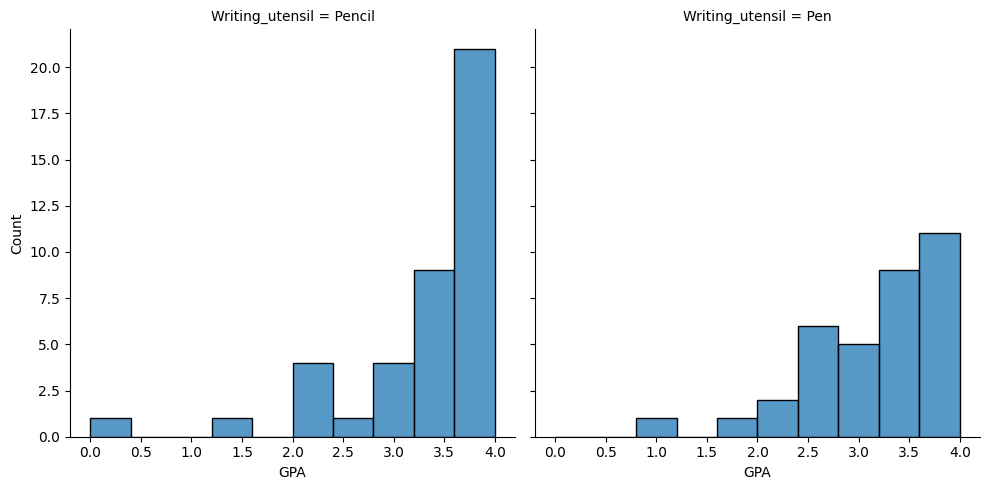

In [ ]:
from seaborn.distributions import kdeplot
sns.displot(x='GPA', col = 'Writing_utensil' , data = df)

<Axes: xlabel='GPA', ylabel='Writing_utensil'>

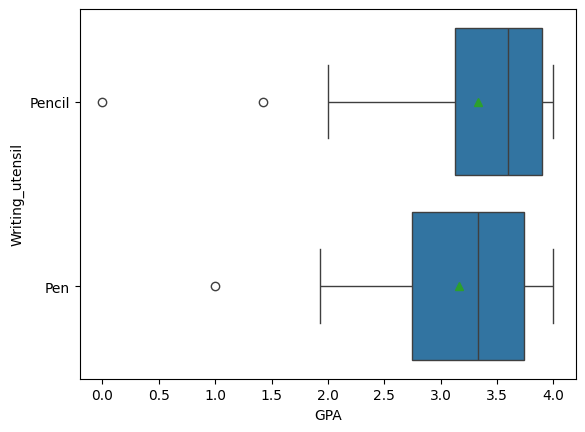

In [ ]:
sns.boxplot(x ='GPA' , y = 'Writing_utensil', showmeans = True, data =df)

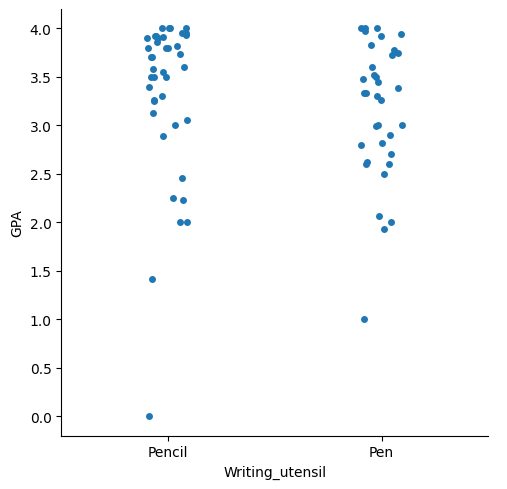

In [ ]:
sns.catplot(x = 'Writing_utensil' , y = 'GPA' , data = df)


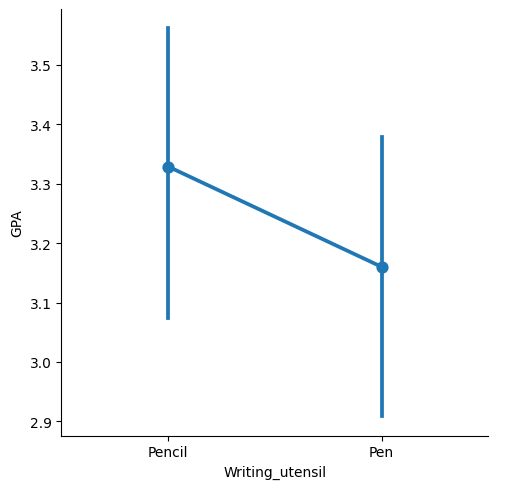

In [ ]:
sns.catplot(x = 'Writing_utensil' , y = 'GPA' , data = df, kind = 'point')

<ipython-input-12-ab18f41cf9a0>:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(y = 'Writing_utensil' , x = 'GPA' , data = df , join = False)


<Axes: xlabel='GPA', ylabel='Writing_utensil'>

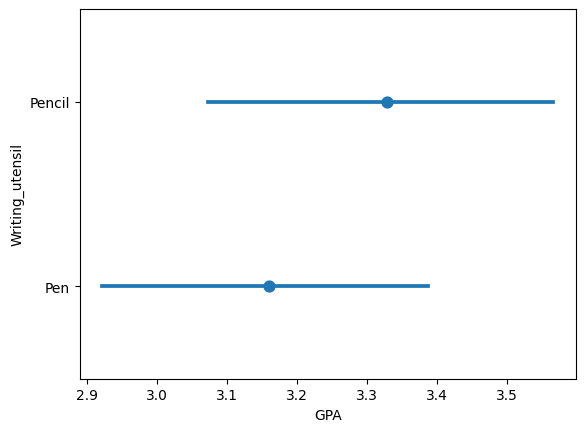

In [ ]:
sns.pointplot(y = 'Writing_utensil' , x = 'GPA' , data = df , join = False)

<ipython-input-13-196b20b3e5d2>:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(y = 'Writing_utensil' , x = 'GPA' , data = df, color = 'r', capsize=.2, join = False)


<Axes: xlabel='GPA', ylabel='Writing_utensil'>

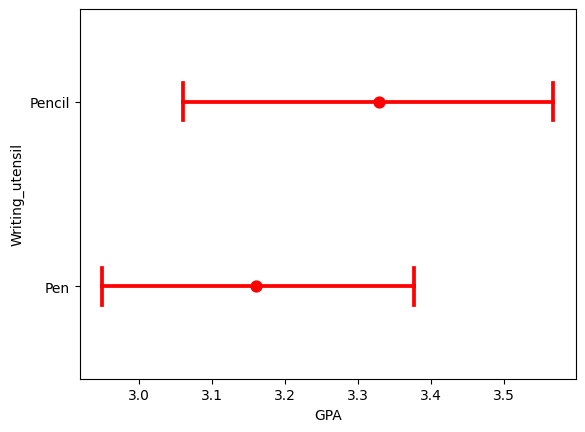

In [ ]:
sns.pointplot(y = 'Writing_utensil' , x = 'GPA' , data = df, color = 'r', capsize=.2, join = False)

<Axes: xlabel='GPA', ylabel='Writing_utensil'>

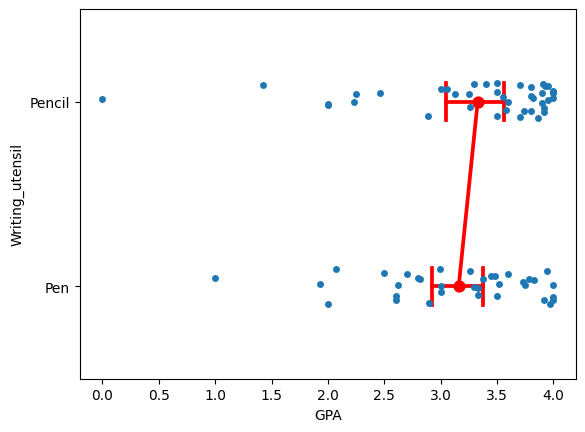

In [ ]:
sns.stripplot(y = 'Writing_utensil' , x = 'GPA' , data = df,dodge=True )
sns.pointplot(y = 'Writing_utensil' , x = 'GPA' , data = df, color = 'r', capsize=.2 )

# **Check for Normality**

In [ ]:
Pen =  df.loc[df['Writing_utensil'] == 'Pen']
Pencil =  df.loc[df['Writing_utensil'] == 'Pencil']

In [ ]:
import scipy.stats as stats

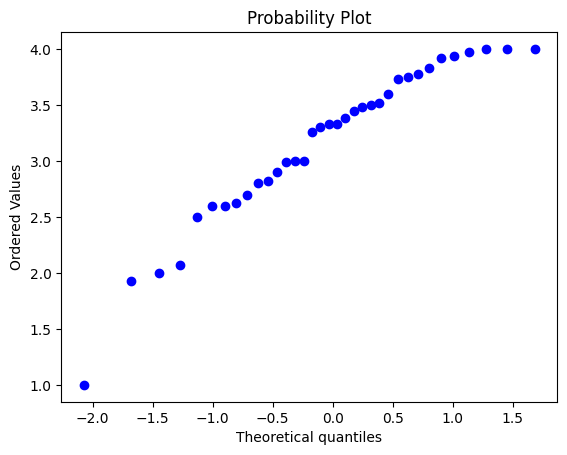

In [ ]:
stats.probplot(Pen['GPA'], dist="norm", plot=plt)
plt.show()

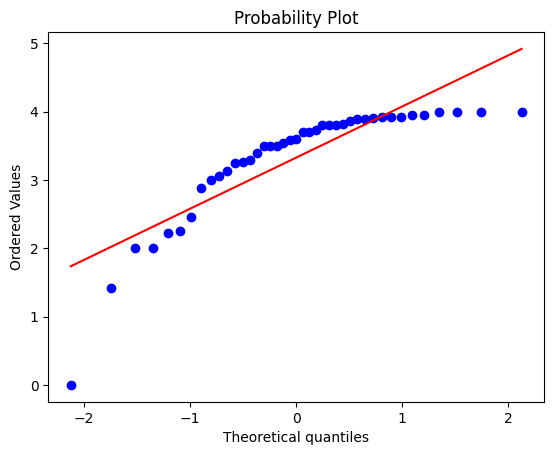

In [ ]:
stats.probplot(Pencil['GPA'], dist="norm", plot=plt)
plt.show()

# 2 Sample t Test

In [ ]:
summary, results = rp.ttest(group1= df['GPA'][df['Writing_utensil'] == 'Pencil'], group1_name= "Pencil",
                            group2= df['GPA'][df['Writing_utensil'] == 'Pen'], group2_name= "Pen")

/usr/local/lib/python3.11/dist-packages/researchpy/ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pencil' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
/usr/local/lib/python3.11/dist-packages/researchpy/ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (Pencil - Pen) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


In [ ]:
print(summary)

   Variable     N      Mean        SD        SE  95% Conf.  Interval
0    Pencil  41.0  3.328780  0.841775  0.131463   3.063083  3.594478
1       Pen  35.0  3.160000  0.704970  0.119162   2.917834  3.402166
2  combined  76.0  3.251053  0.781270  0.089618   3.072525  3.429580


In [ ]:
print(results)

             Independent t-test  results
0  Difference (Pencil - Pen) =    0.1688
1         Degrees of freedom =   74.0000
2                          t =    0.9380
3      Two side test p value =    0.3513
4     Difference < 0 p value =    0.8243
5     Difference > 0 p value =    0.1757
6                  Cohen's d =    0.2159
7                  Hedge's g =    0.2137
8             Glass's delta1 =    0.2005
9           Point-Biserial r =    0.1084
